## Visualizing results

First up is results for the vanilla QAOA with two param initializations: vanilla and gaussian, and two optimizers: COBYLA and COBYQA.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [26]:
df_vanilla_no_ws = pd.read_csv('results_vanilla_for_param_init_and_optimizer.csv')
df_vanilla_no_ws.head()
df_vanilla_no_ws.columns = ['index', 'param_initialization', 'qaoa_variant', 'optimizer', 'depth', 'graph_size', 'graph_name', 'time_elapsed', 'quantum_func_evals', 'obj_func_evolution','quantum_solution', 'quantum_obj_value', 'classic_solution', 'classic_value']
df_vanilla_no_ws = df_vanilla_no_ws.drop(columns=['index'])
df_vanilla_no_ws.head()




,param_initialization,qaoa_variant,optimizer,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
0,uniform,vanilla,COBYLA,3,9,DFw,366.075175,35,"[array(-0.08505104), array(0.31686122), array(...","[1, 1, 1, 0, 0]",3.380622,"[1.0, 1.0, 1.0, 0, 0]",3.380622
1,uniform,vanilla,COBYLA,3,9,DUw,488.570764,46,"[array(0.09996914), array(-0.19987805), array(...","[0, 0, 1, 1, 1]",2.854180,"[1.0, 1.0, 0, 0, 0]",2.854180
2,uniform,vanilla,COBYLA,3,9,DV{,404.778647,38,"[array(-0.05486785), array(0.09201333), array(...","[1, 1, 0, 0, 0]",2.169811,"[1.0, 1.0, 0, 0, 0]",2.169811
3,uniform,vanilla,COBYLA,3,9,DUW,510.752156,49,"[array(0.25411182), array(-0.02753883), array(...","[1, 1, 0, 0, 1]",2.389642,"[1.0, 1.0, 0, 0, 1.0]",2.389642
4,uniform,vanilla,COBYLA,3,9,DC{,413.004720,39,"[array(-0.45197184), array(0.06088919), array(...","[1, 1, 1, 1, 0]",3.376899,"[1.0, 1.0, 1.0, 1.0, 0]",3.376899


In [27]:
df_different = df_vanilla_no_ws[np.invert(np.isclose(df_vanilla_no_ws['quantum_obj_value'], df_vanilla_no_ws['classic_value']))]
df_different.head()


,param_initialization,qaoa_variant,optimizer,depth,graph_size,graph_name,time_elapsed,quantum_func_evals,obj_func_evolution,quantum_solution,quantum_obj_value,classic_solution,classic_value
7,uniform,vanilla,COBYLA,3,9,DU{,457.609560,43,"[array(0.38526612), array(0.22609557), array(0...","[0, 1, 0, 0, 1]",2.826644,"[0, 0, 1.0, 1.0, 0]",3.277056
8,uniform,vanilla,COBYLA,3,9,DF{,443.813889,42,"[array(-0.18946998), array(0.29096427), array(...","[0, 0, 1, 0, 1]",2.811654,"[1.0, 1.0, 1.0, 0, 0]",3.625973
9,uniform,vanilla,COBYLA,3,9,DEw,648.881486,62,"[array(0.19194899), array(-0.26340989), array(...","[0, 0, 1, 1, 1]",2.784541,"[1.0, 1.0, 1.0, 0, 0]",2.790812
12,uniform,vanilla,COBYLA,3,9,D~{,353.529588,33,"[array(0.30397651), array(-0.08888541), array(...","[1, 0, 1, 0, 1]",2.806798,"[1.0, 0, 0, 0, 1.0]",3.667585
13,uniform,vanilla,COBYLA,3,9,DQ{,467.578031,44,"[array(0.01864523), array(0.10052049), array(0...","[0, 1, 1, 0, 1]",2.254352,"[1.0, 1.0, 0, 1.0, 0]",2.564163


In [33]:
from ast import literal_eval
print(df_different['graph_size'].value_counts())
df_vanilla_no_ws['quantum_solution'] = df_vanilla_no_ws['quantum_solution'].apply(lambda x: literal_eval(x))
df_vanilla_no_ws['graph_size'] = df_vanilla_no_ws['quantum_solution'].apply(lambda x: len(x))


graph_size
9    62
8    52
7    45
6    37
5    28
Name: count, dtype: int64


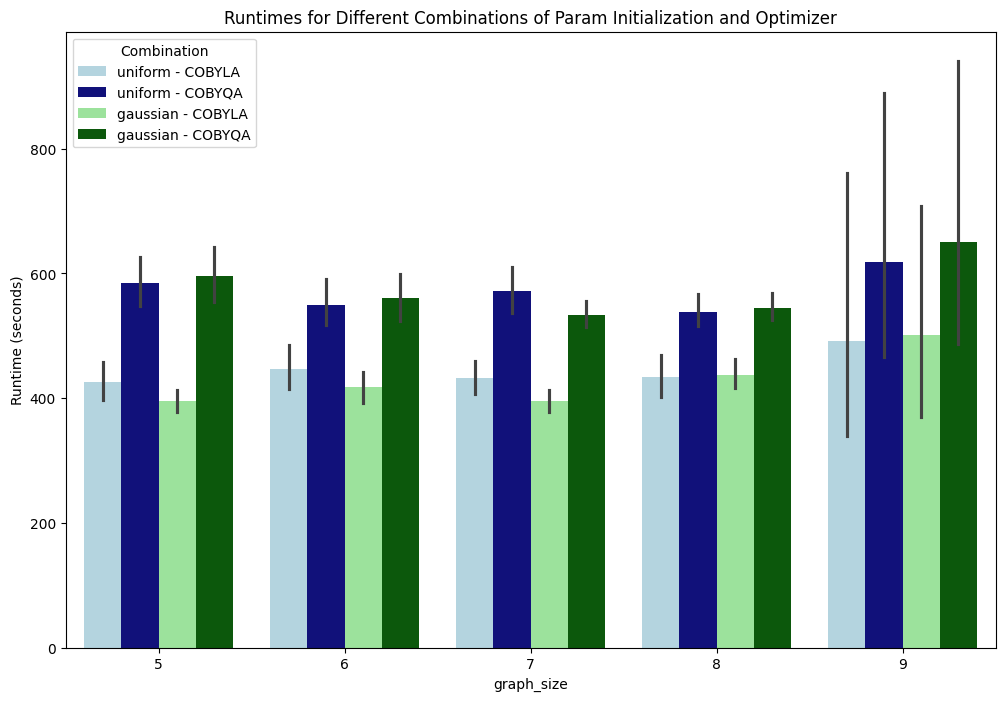

In [ ]:
import seaborn as sns

# Filter the dataframe for the required combinations
filtered_df = df_vanilla_no_ws[df_vanilla_no_ws['param_initialization'].isin(['uniform', 'gaussian']) & 
                               df_vanilla_no_ws['optimizer'].isin(['COBYLA', 'COBYQA'])]

# Create a new column for the combination of param_initialization and optimizer
filtered_df['combination'] = filtered_df['param_initialization'] + ' - ' + filtered_df['optimizer']
custom_colors = ['#ADD8E6', '#00008B', '#90EE90', '#006400']


plt.figure(figsize=(12, 8))
# Plot the data with custom colors
sns.barplot(data=filtered_df, x='graph_size', y='time_elapsed', hue='combination', palette=custom_colors)
plt.ylabel('Runtime (seconds)')
plt.title('Runtimes for Different Combinations of Param Initialization and Optimizer')
plt.legend(title='Combination')
plt.show()

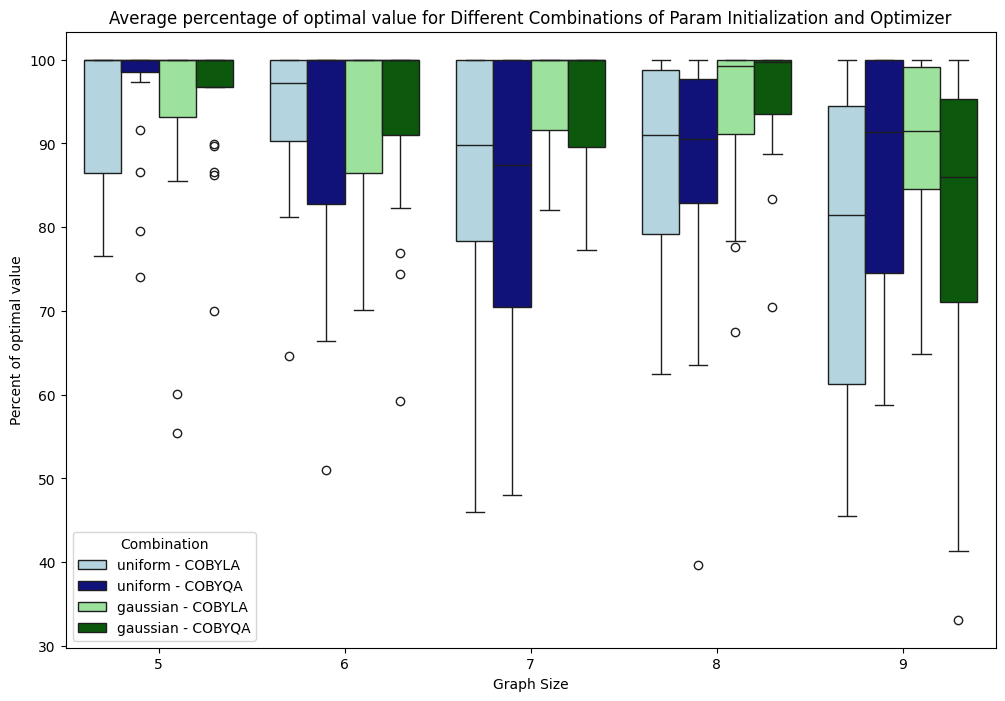

In [43]:

# Filter the dataframe for the required combinations
filtered_df = df_vanilla_no_ws[df_vanilla_no_ws['param_initialization'].isin(['uniform', 'gaussian']) & 
                               df_vanilla_no_ws['optimizer'].isin(['COBYLA', 'COBYQA'])]

# Create a new column for the combination of param_initialization and optimizer
filtered_df['combination'] = filtered_df['param_initialization'] + ' - ' + filtered_df['optimizer']
filtered_df['percentage_optimal'] = 100*(filtered_df['quantum_obj_value']/filtered_df['classic_value'])

# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='graph_size', y='percentage_optimal', hue='combination', palette=custom_colors)
plt.xlabel('Graph Size')
plt.ylabel('Percent of optimal value')
plt.title('Average percentage of optimal value for Different Combinations of Param Initialization and Optimizer')
plt.legend(title='Combination')
plt.show()


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_25328\1882104171.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


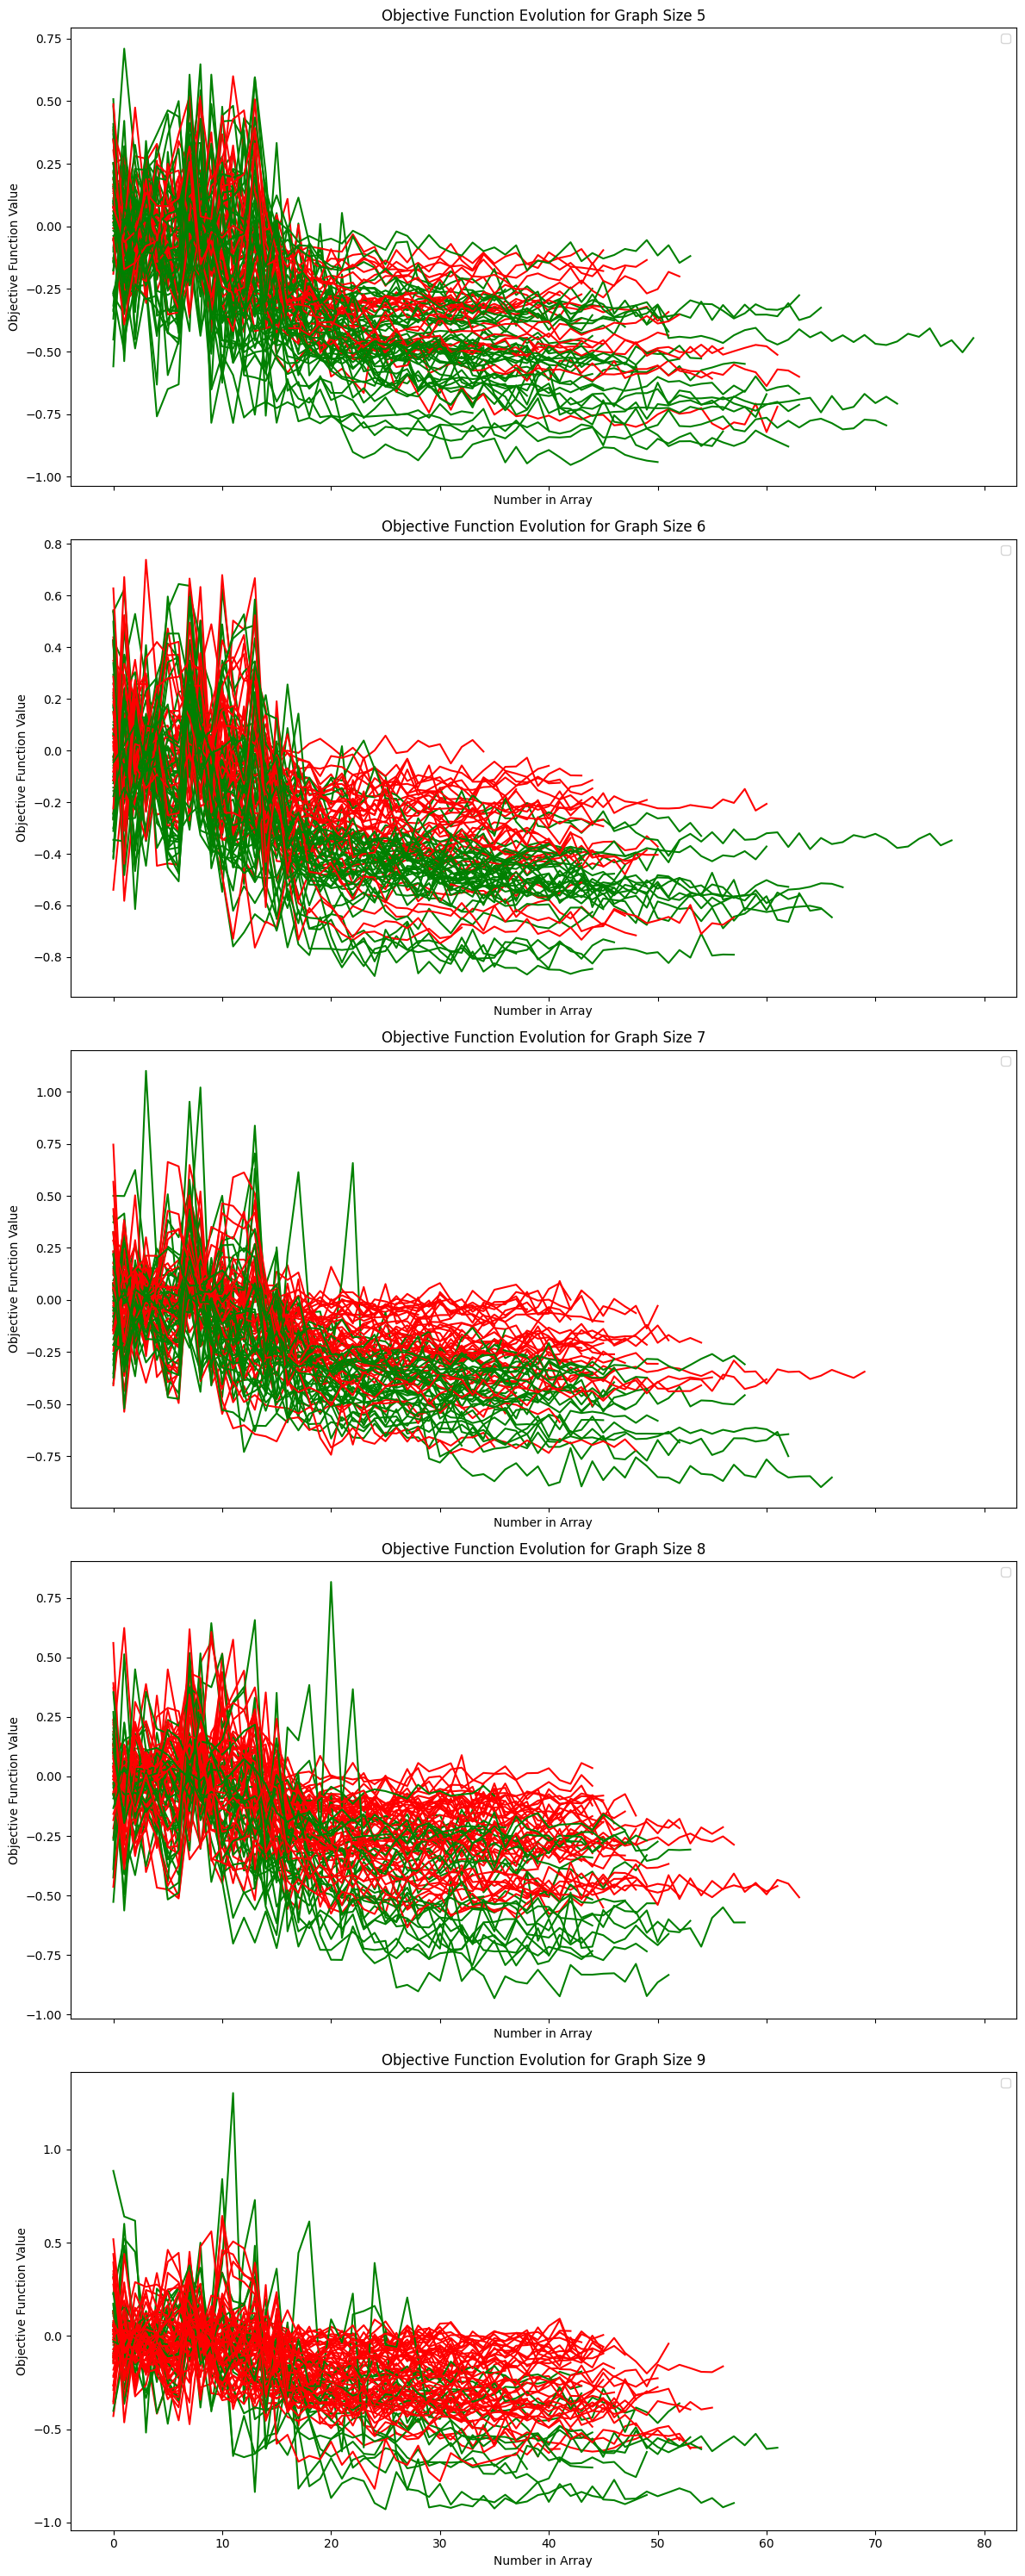

In [49]:
# Define a function to plot the objective function evolution
import re

def find_numbers(string): 
    numbers = re.findall(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", string)

    # Convert the extracted values into a NumPy array
    return np.array([float(num) for num in numbers])

def plot_obj_func_evolution(df):
    unique_graph_sizes = df['graph_size'].unique()
    num_graph_sizes = len(unique_graph_sizes)
    fig, axes = plt.subplots(num_graph_sizes, 1, figsize=(12, 6 * num_graph_sizes), sharex=True)

    if num_graph_sizes == 1:
        axes = [axes]

    for i, graph_size in enumerate(unique_graph_sizes):
        ax = axes[i]
        subset = df[df['graph_size'] == graph_size]
        for _, row in subset.iterrows():
            obj_func_evolution = find_numbers(row['obj_func_evolution'])
            color = 'green' if np.isclose(row['quantum_obj_value'], row['classic_value']) else 'red'
            ax.plot(obj_func_evolution, color=color)
        
        ax.set_title(f'Objective Function Evolution for Graph Size {graph_size}')
        ax.set_xlabel('Number in Array')
        ax.set_ylabel('Objective Function Value')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function with the dataframe
plot_obj_func_evolution(df_vanilla_no_ws)

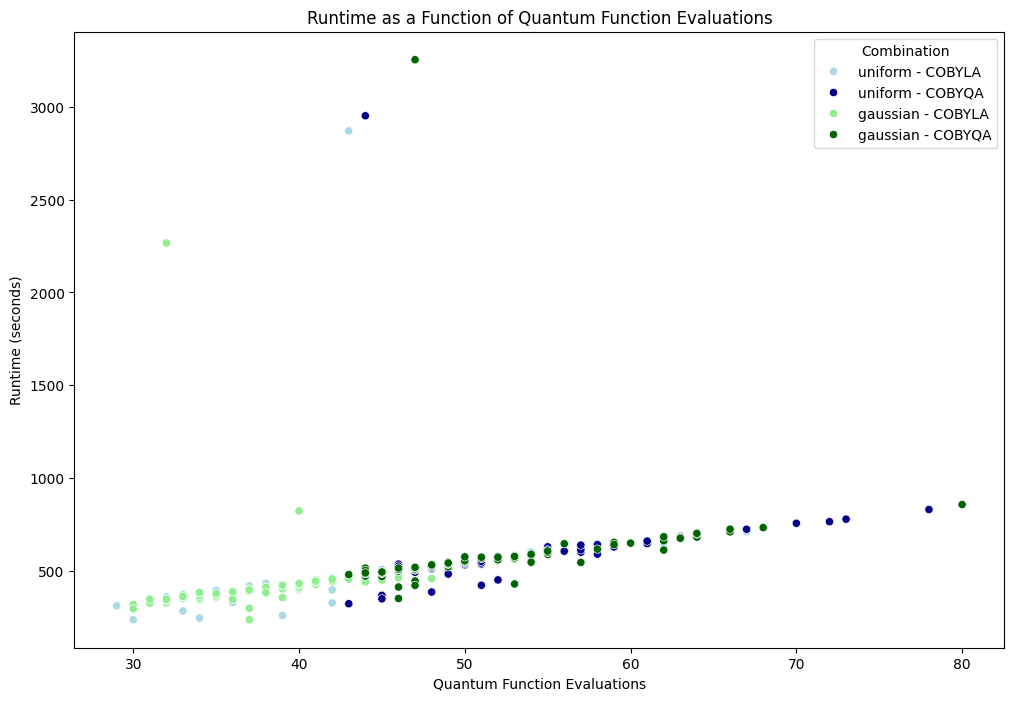

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df, x='quantum_func_evals', y='time_elapsed', hue='combination', palette=custom_colors)
plt.xlabel('Quantum Function Evaluations')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime as a Function of Quantum Function Evaluations')
plt.legend(title='Combination')
plt.show()


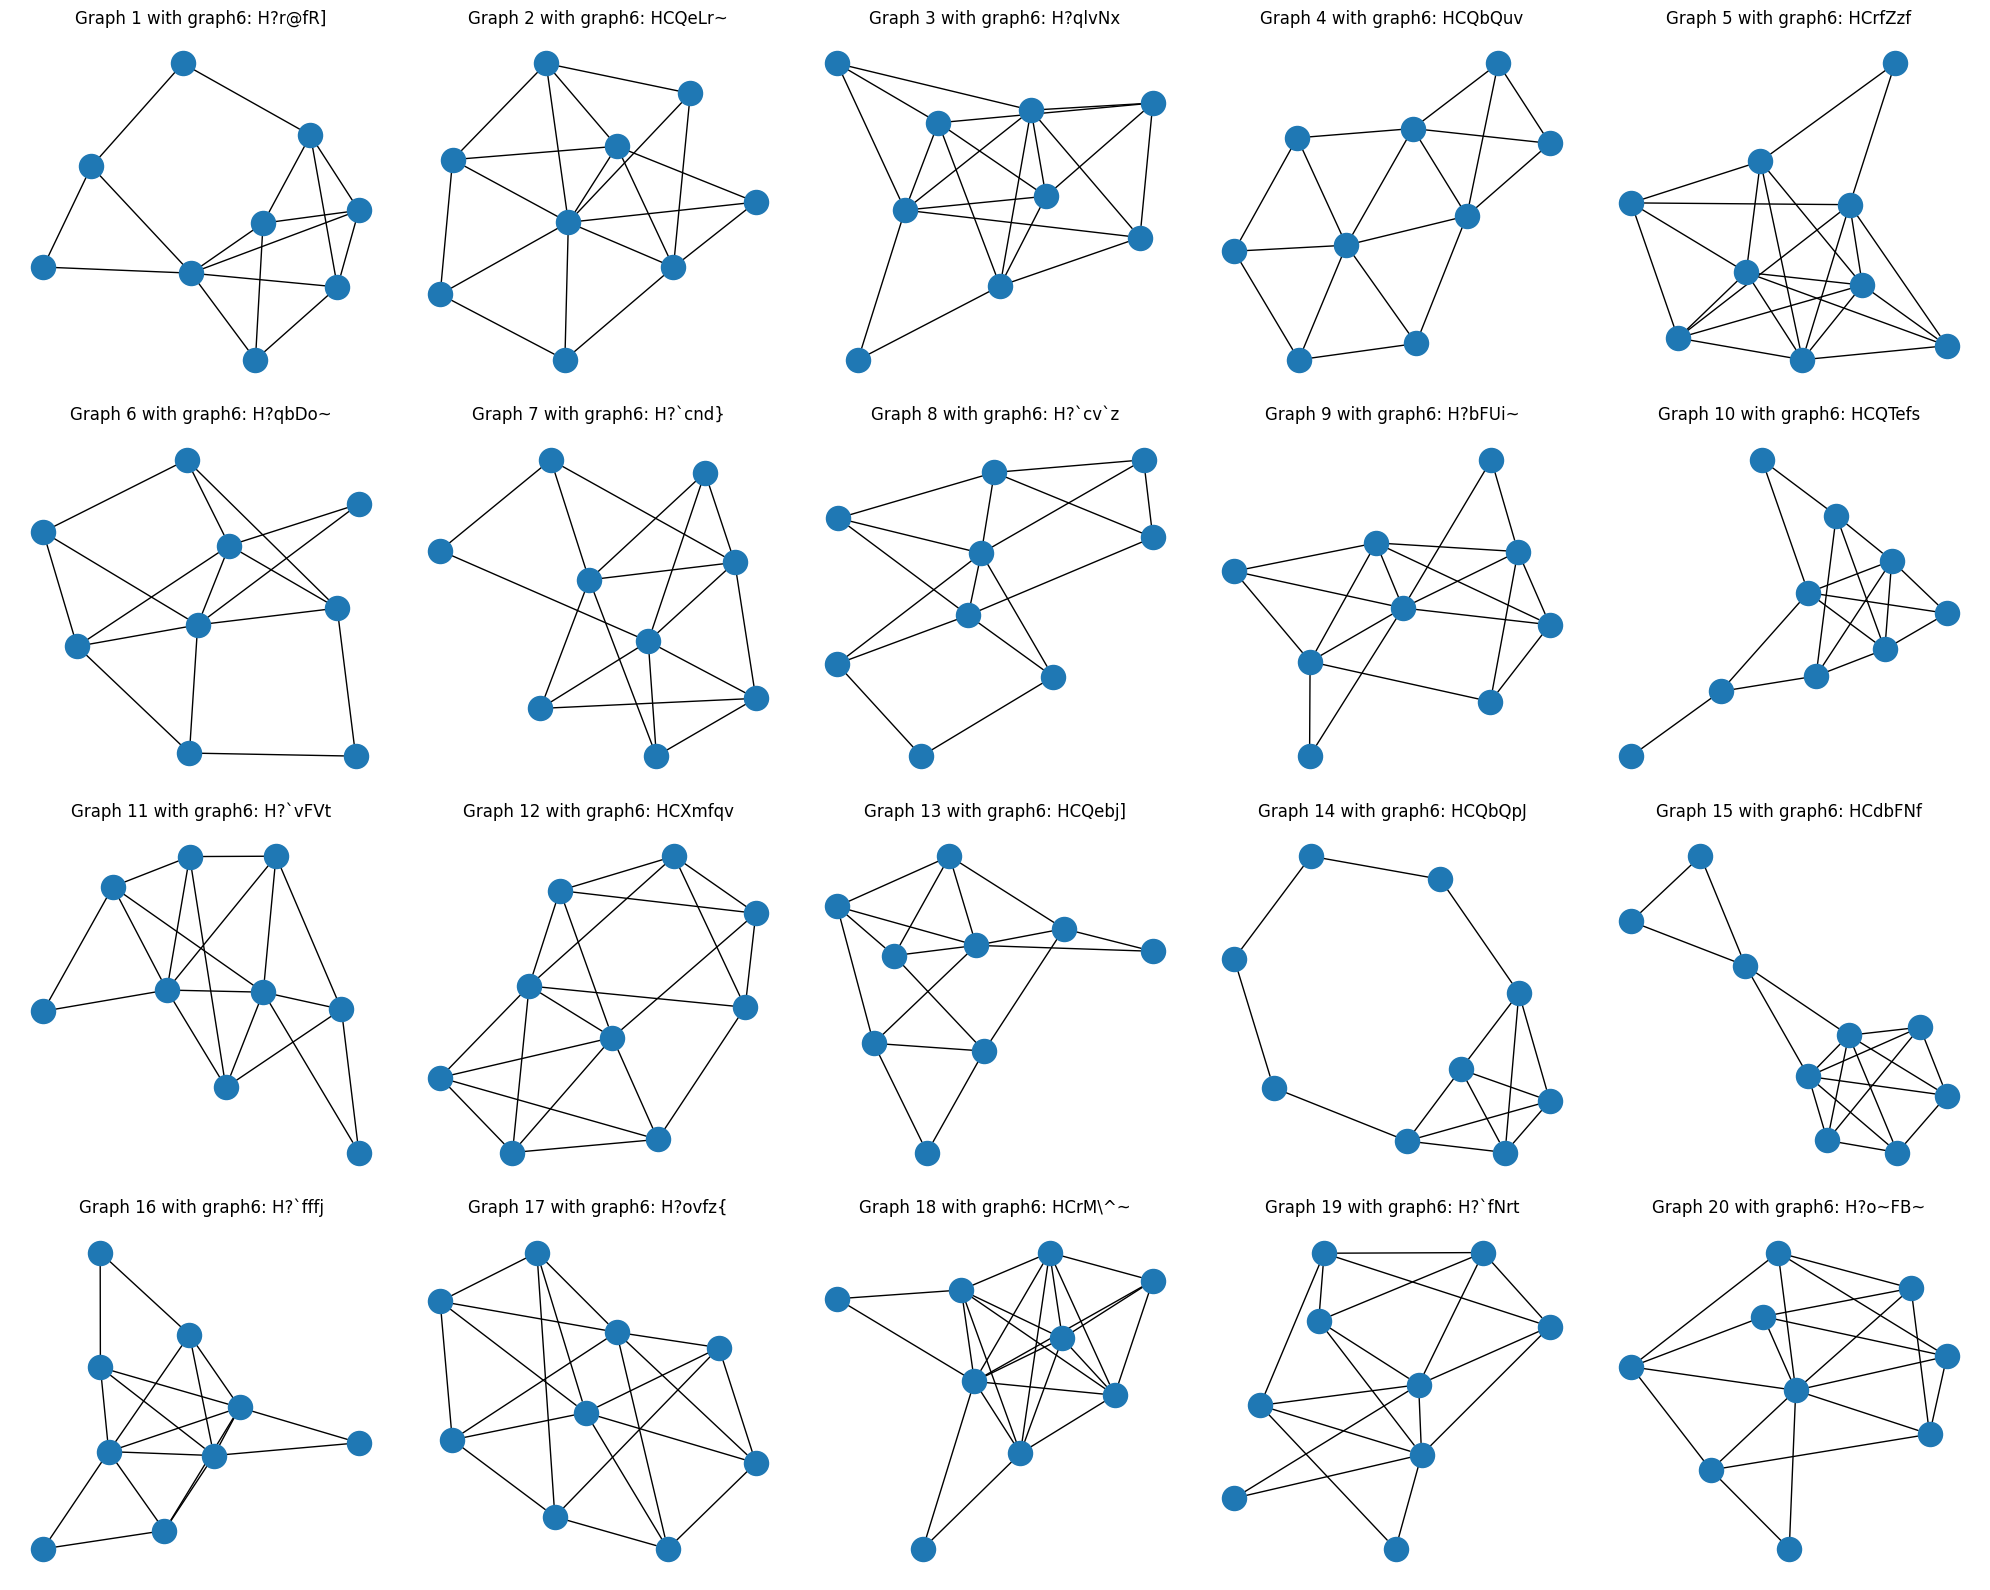

In [54]:
from MaxCutProblem import MaxCutProblem

problem = MaxCutProblem()

problem.draw_test_graphs(9)